In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import MarkerCluster

%matplotlib inline


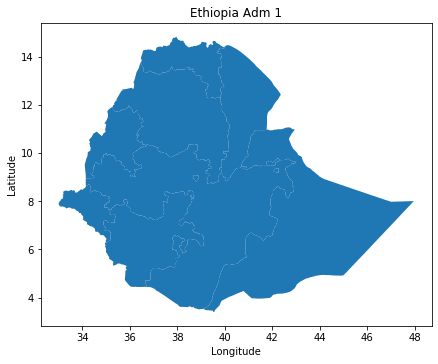

In [4]:
# Importing Modules
eth = gpd.read_file('Data/ETH-GADM-Adm-Boundaries/gadm36_ETH_1.shp')

fig, ax = plt.subplots(figsize=(7, 7))
eth.plot(ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Ethiopia Adm 1')
plt.show()


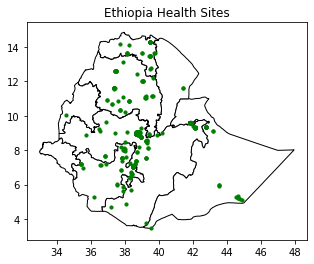

In [5]:
eth_heathsites = gpd.read_file('Data/ETH-healthsites-shapefiles/healthsites.shp')

base = eth.plot(color='white', edgecolor='black')
eth_heathsites.plot(ax=base, marker='o', color='green', markersize=10)

plt.title('Ethiopia Health Sites')
plt.show()


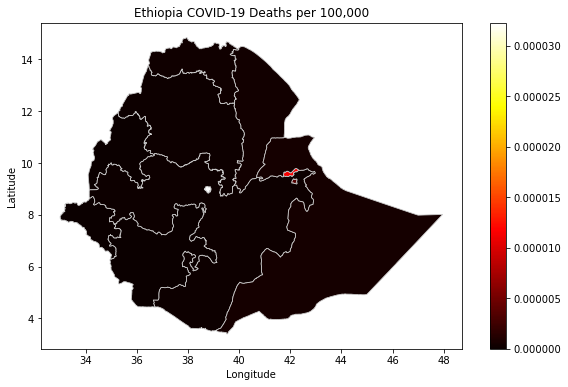

In [6]:
df = pd.read_csv('Data/ETH-COVID-19/Ethiopia_COVID19_Subnational_Cases.csv', header=0, skiprows=1)

df = df[['#date','#adm1+name', 'Unnamed: 3', '#affected+infected+confirmed', '#affected+infected+dead']]

df = df.rename(index=str, columns={'#date': 'Date',
                                   'Unnamed: 3': 'Population',
                                   '#adm1+name': 'Adm1',
                                   '#affected+infected+confirmed': 'Confirmed Cases',
                                   '#affected+infected+dead': 'Reported Deaths'})

df["Date"] = pd.to_datetime(df["Date"])
df = df[(df['Date'] > '2020-10-15 00:00:00')]

df = df[['Adm1', 'Population', 'Confirmed Cases', 'Reported Deaths']]
df['Confirmed Cases'] = df['Confirmed Cases'].astype(int)
df['Reported Deaths'] = df['Reported Deaths'].astype(int)
df['Population'] = df['Population'].astype(int)

df = df.replace(to_replace =["SNNPR", 'Addis Ababa', 'Harari', 'Benshangul Gumuz', 'Gambela'],
           value =["Southern Nations, Nationalities and Peoples", 'Addis Abeba', 'Harari People',
                  'Benshangul-Gumaz', 'Gambela Peoples'])

df["Cases per 100,000"] = df['Confirmed Cases']/df['Population']
df["Deaths per 100,000"] = df['Reported Deaths']/df['Population']

# join the geodataframe with the cleaned up csv dataframe

merged = eth.set_index('NAME_1').join(df.set_index('Adm1'))

# set a variable that will call whatever column we want to visualise on the map
variable = 'Deaths per 100,000'
colorscale = 'hot'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Ethiopia COVID-19 '+variable)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()


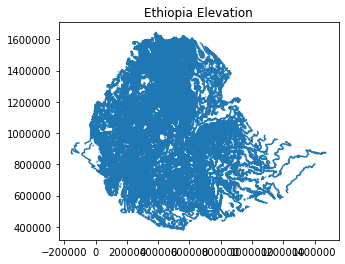

In [8]:
eth_elev = gpd.read_file('Data/ETH-elev-contours/eth_cont_200.shp')
fig, ax = plt.subplots()
eth_elev.plot(ax=ax)

ax.set_title('Ethiopia Elevation')
plt.show()


In [9]:
eth_elev

FNODE_  TNODE_  LPOLY_  RPOLY_       LENGTH  ETTOPOL01C  ELEVATION  \
0          2       3       2       2    629.94457        1000       1000   
1          5       5       2       2   5143.36779        1200       1200   
2          7       7       2       2   5656.58699        1200       1200   
3          4       6       2       2  44479.31145        1000       1000   
4          8       8       2       2   4141.64789        1200       1200   
...      ...     ...     ...     ...          ...         ...        ...   
9124    9292    9279       2       2  16340.77585        1000       1000   
9125       0       0       0       0      0.00000         415        415   
9126       0       0       0       0      0.00000         415        415   
9127       0       0       0       0      0.00000         515        515   
9128       0       0       0       0      0.00000         515        515   

                                               geometry  
0     LINESTRING (381819.698 1643867.847, 381744.250...  
1     LINESTRING (384645.594 1633116.125, 384994.094...  
2     LINESTRING (390545.281 1630310.375, 391159.500...  
3     LINESTRING (380398.323 1641458.552, 380386.281...  
4     LINESTRING (384457.688 1626752.875, 384988.875...  
...                                                 ...  
9124  LINESTRING (556222.688 382491.000, 557368.625 ...  
9125  LINESTRING (-148772.881 902375.490, -153693.57...  
9126  LINESTRING (-147366.968 900266.620, -138931.48...  
9127  LINESTRING (-32785.034 986027.331, -32082.077 ...  
9128  LINESTRING (7283.495 754051.636, 7283.495 7652...  

[9129 rows x 8 columns]

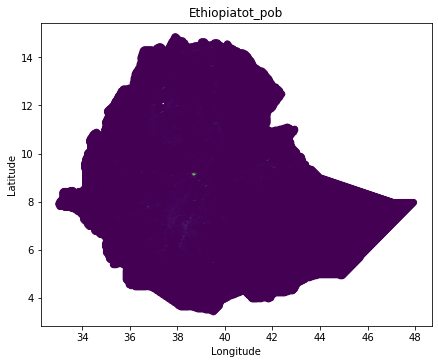

In [11]:
eth_climatechange = gpd.read_file('Data/ETH-climate-change-indicators/gar_exp_ETH.shp')
var = 'tot_pob'
fig, ax = plt.subplots(figsize=(7, 7))
eth_climatechange.plot(column=var, ax=ax)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Ethiopia'+var)
plt.show()


In [14]:
eth_climatechange

id_5x iso3  bed_prv_pu  bed_pub_pu  edu_prv_pu  edu_pub_pu  \
0      6523921  ETH         0.0         0.0         0.0         0.0   
1      6523922  ETH         0.0         0.0         0.0         0.0   
2      6526190  ETH         0.0         0.0         0.0         0.0   
3      6526191  ETH         0.0         0.0         0.0         0.0   
4      6526192  ETH         0.0         0.0         0.0         0.0   
...        ...  ...         ...         ...         ...         ...   
53020  7086038  ETH         0.0         0.0         0.0         0.0   
53021  7087810  ETH         0.0         0.0         0.0         0.0   
53022  7087812  ETH         0.0         0.0         0.0         0.0   
53023  7087813  ETH         0.0         0.0         0.0         0.0   
53024  7089586  ETH         0.0         0.0         0.0         0.0   

       emp_agr_pu  emp_gov_pu  emp_ind_pu  emp_ser_pu  ...  emp_ind_cr  \
0             0.0         0.0         0.0         0.0  ...      0.0386   
1             0.0         0.0         0.0         0.0  ...      0.0289   
2             0.0         0.0         0.0         0.0  ...      0.0260   
3             0.0         0.0         0.0         0.0  ...      0.0286   
4             0.0         0.0         0.0         0.0  ...      0.1015   
...           ...         ...         ...         ...  ...         ...   
53020         0.0         0.0         0.0         0.0  ...      0.0554   
53021         0.0         0.0         0.0         0.0  ...      0.0232   
53022         0.0         0.0         0.0         0.0  ...      0.0872   
53023         0.0         0.0         0.0         0.0  ...      0.1034   
53024         0.0         0.0         0.0         0.0  ...      0.0275   

       emp_ser_cr  ic_high_cr  ic_low_cr  ic_mhg_cr  ic_mlw_cr  tot_cr  \
0          0.0676         0.0     0.0827        0.0        0.0  0.3609   
1          0.0505         0.0     0.0619        0.0        0.0  0.2701   
2          0.0451         0.0     0.0554        0.0        0.0  0.2417   
3          0.0501         0.0     0.0612        0.0        0.0  0.2674   
4          0.1769         0.0     0.2169        0.0        0.0  0.9460   
...           ...         ...        ...        ...        ...     ...   
53020      0.0965         0.0     0.1184        0.0        0.0  0.5166   
53021      0.0403         0.0     0.0496        0.0        0.0  0.2160   
53022      0.1524         0.0     0.1867        0.0        0.0  0.8144   
53023      0.1807         0.0     0.2215        0.0        0.0  0.9661   
53024      0.0480         0.0     0.0588        0.0        0.0  0.2562   

        tot_pob  tot_val                   geometry  
0       817.299   0.3609  POINT (37.89583 14.84583)  
1       611.674   0.2701  POINT (37.93750 14.84583)  
2       547.466   0.2417  POINT (37.89583 14.80417)  
3       605.473   0.2674  POINT (37.93750 14.80417)  
4      2142.560   0.9460  POINT (37.97917 14.80417)  
...         ...      ...                        ...  
53020  1170.040   0.5166   POINT (39.60417 3.51250)  
53021   489.259   0.2160   POINT (39.43750 3.47083)  
53022  1844.520   0.8144   POINT (39.52083 3.47083)  
53023  2188.060   0.9661   POINT (39.56250 3.47083)  
53024   580.171   0.2562   POINT (39.52083 3.42917)  

[53025 rows x 57 columns]